# **Project Computation**

# **Regression Tree**

# Load and split data
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train regression tree
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 8))
plot_tree(tree, filled=True, feature_names=fetch_california_housing().feature_names)
plt.show()


Test MSE: 0.4917480543602615


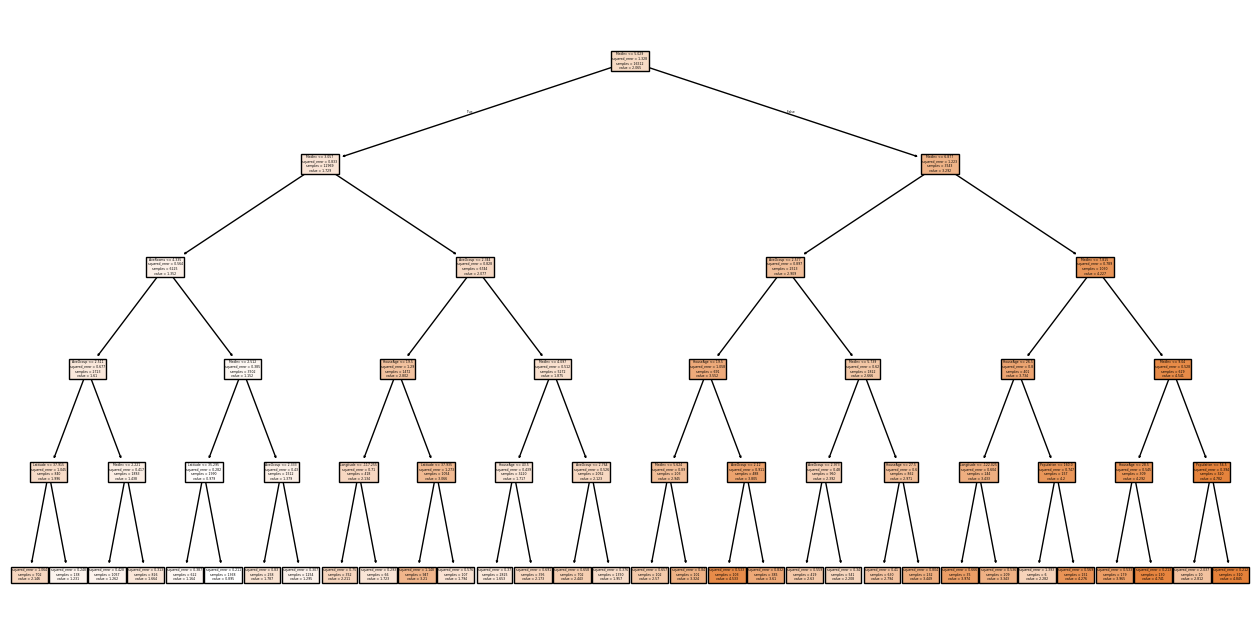

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load and split data
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train regression tree
tree = DecisionTreeRegressor(max_depth=5)
tree.fit(X_train, y_train)

# Predict and evaluate
y_pred = tree.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Test MSE:", mse)

# Visualize the tree
from sklearn.tree import plot_tree
plt.figure(figsize=(16, 8))
plot_tree(tree, filled=True, feature_names=fetch_california_housing().feature_names)
plt.show()

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.46153846153846156, 0.8333333333333333, 'True  '),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.5384615384615384, 0.8333333333333333, '  False'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 

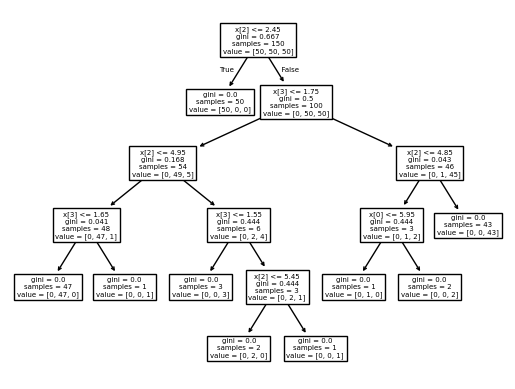

In [ ]:
tree.plot_tree(clf)

## **Tuning Techniques**

# Regression Trees - Grid Search

You define a grid of possible values for each hyperparameter and evaluate the model performance (e.g., using cross-validation) for each combination.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 10}


## Regression Trees - Random Search

This is useful when the hyperparameter space is large. It randomly samples combinations instead of exhaustively testing all.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'max_depth': randint(3, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

random_search = RandomizedSearchCV(DecisionTreeRegressor(), param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)


Best parameters: {'max_depth': 14, 'min_samples_leaf': 18, 'min_samples_split': 9}



The simplest way to tune hyperparameters is by doing a grid search. A grid search involves trying out every possible hyperparameter combination from a predefined set. We have shown an example of this method at the very start when using the elbow method to find the optimal number of clusters for the K-means algorithm. The main drawback of this technique is its computational inefficiency. In the case of finding the number of clusters we only have one hyperparameter that can take a limited number of integer values. It is often infeasible to use grid search for more complex problems due to the curse of dimensionality.



# **PCA: Principal Component Analysis**

In [ ]:
%pip install pca --quiet

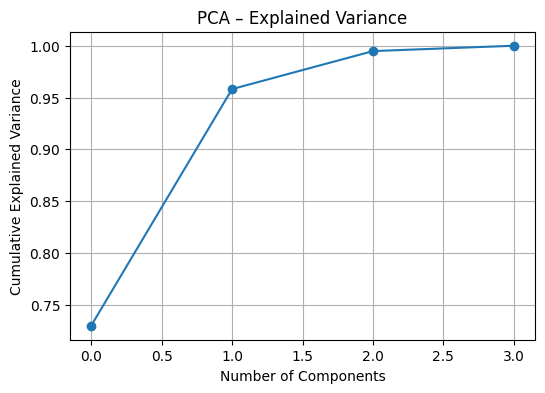

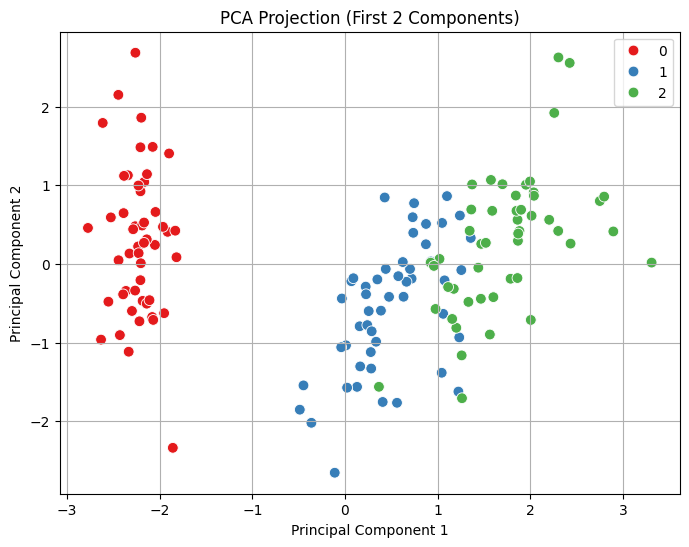

Explained variance by each component: [0.72962445 0.22850762]
Total explained variance: 0.9581320720000166


In [ ]:
# PCA: Principal Component Analysis

# ----------------------------
# STEP 1: Import libraries
# ----------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

# ----------------------------
# STEP 2: Load a dataset (use Iris as example)
# ----------------------------
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name='Target')

# ----------------------------
# STEP 3: Standardize the features
# ----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ----------------------------
# STEP 4: Apply PCA
# ----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ----------------------------
# STEP 5: Visualize the explained variance
# ----------------------------
plt.figure(figsize=(6, 4))
plt.plot(np.cumsum(PCA().fit(X_scaled).explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA – Explained Variance')
plt.grid(True)
plt.show()

# ----------------------------
# STEP 6: Visualize the transformed data
# ----------------------------
X_pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
X_pca_df['Target'] = y

plt.figure(figsize=(8, 6))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='Target', palette='Set1', s=60)
plt.title('PCA Projection (First 2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.legend()
plt.show()

# ----------------------------
# STEP 7: Show explained variance ratios
# ----------------------------
print("Explained variance by each component:", pca.explained_variance_ratio_)
print("Total explained variance:", np.sum(pca.explained_variance_ratio_))


### PCA – Tuning n_components using Explained Variance

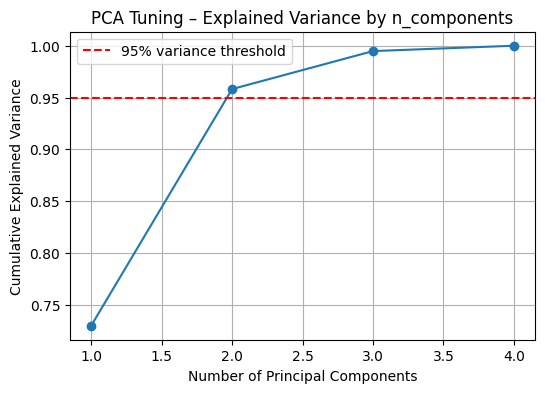

Optimal number of components: 2


In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load and scale data
iris = load_iris()
X = iris.data
X_scaled = StandardScaler().fit_transform(X)

# Try multiple values for n_components
pca = PCA().fit(X_scaled)
explained_var = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(explained_var)+1), explained_var, marker='o')
plt.title('PCA Tuning – Explained Variance by n_components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance threshold')
plt.legend()
plt.show()

# Choose n_components that explains ≥95% variance
optimal_components = np.argmax(explained_var >= 0.95) + 1
print(f"Optimal number of components: {optimal_components}")


This plot shows the cumulative explained variance of PCA on the Iris data. The red dashed line is the 95% variance threshold, which is reached with only the first **2 principal components**. This means we can reduce the dimension from 4 to 2 without sacrificing too much information

# **K-Means Clustering**

There is no single correct way to interpret the results of the elbow method. For our dataset, the best number of clusters seems to be 3.

Iris is a 4-dimensional dataset. We can effectively visualize it by using the first two principal components as the axes. Here we are only using PCA for visualization, the K-means itself is run on the raw data without transformations.

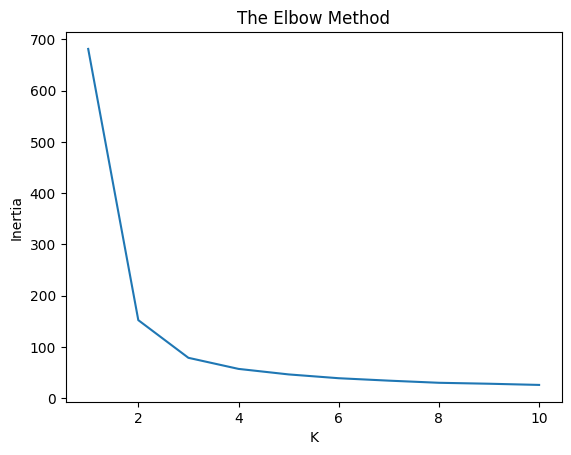

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans

iris = datasets.load_iris()
inertia = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i, init="k-means++", max_iter=300, n_init=10, random_state=42
    )
    kmeans.fit(iris["data"])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title("The Elbow Method")
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

[pca] >n_components is set to 3
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [4] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
The first 2 components explain 95.81% of variance


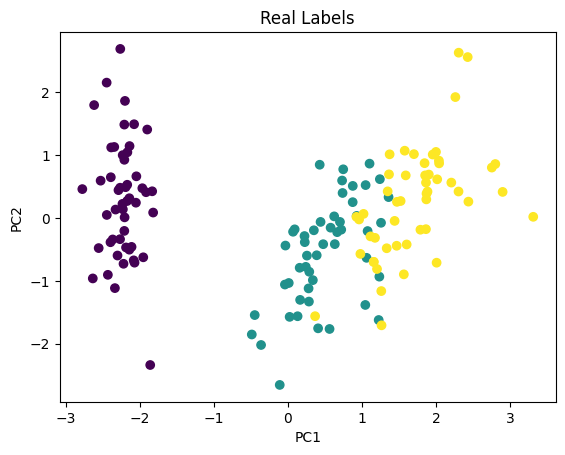

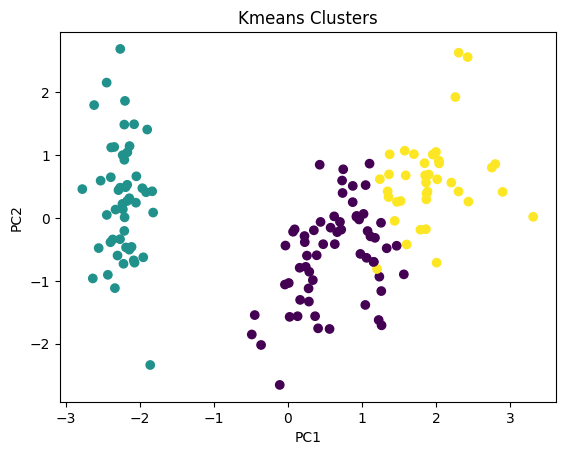

In [ ]:
from pca import pca
import pandas as pd


# Run K-means for 3 clusters
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, n_init=10, random_state=0)
ymeans = kmeans.fit_predict(iris["data"])

# Transform the features through PCA
iris_feat_df = pd.DataFrame(data=iris["data"], columns=iris["feature_names"])
model = pca(normalize=True, n_components=None)
out = model.fit_transform(iris_feat_df)
print(f"The first 2 components explain {round(out['explained_var'][1]*100, 2)}% of variance")

# Plot real labels
plt.scatter(out["PC"]["PC1"], out["PC"]["PC2"], c=iris["target"])
plt.title("Real Labels")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Plot clustering results
plt.scatter(out["PC"]["PC1"], out["PC"]["PC2"], c=ymeans)
plt.title("Kmeans Clusters")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

The cluster number and shape obtained via K-means are very similar to the real shapes. This means that if the labels weren't available, we would be able to correctly determine the underlying structure of the data using K-means.